In [2]:
%matplotlib inline

import numpy as np

# Generate white noise timeseries for all filters
# 10s of samples at 16,384kHz
white = np.random.randn(10*16384)

# Filters GWpy

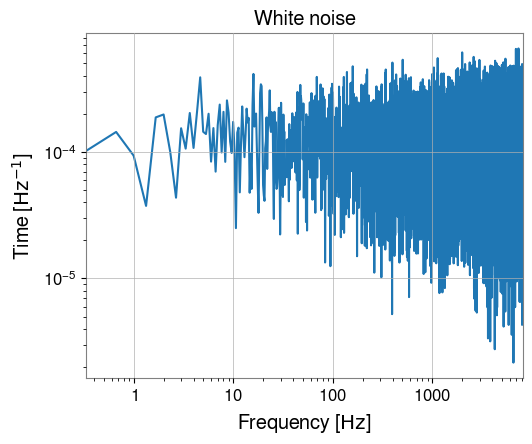

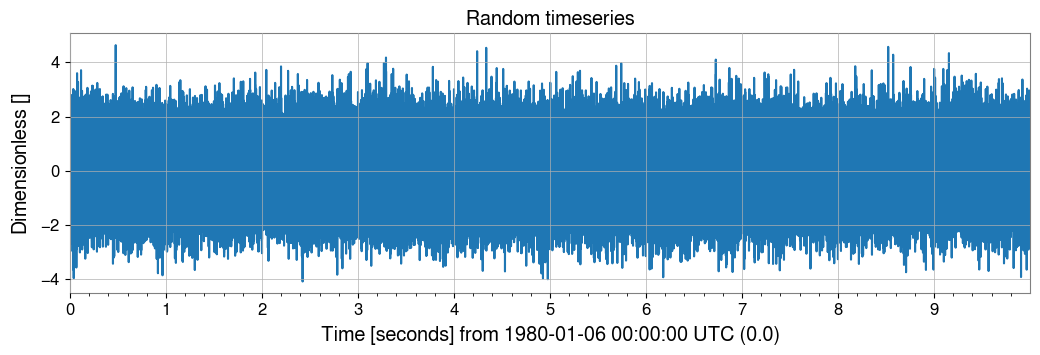

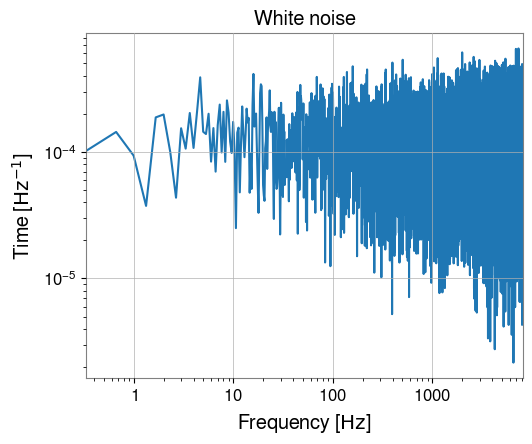

In [3]:
from gwpy.timeseries import TimeSeries

wh = TimeSeries(white, dt=1./16384.)

wh.plot(title="Random timeseries")
wh.psd(3).plot(title="White noise")

## Low pass

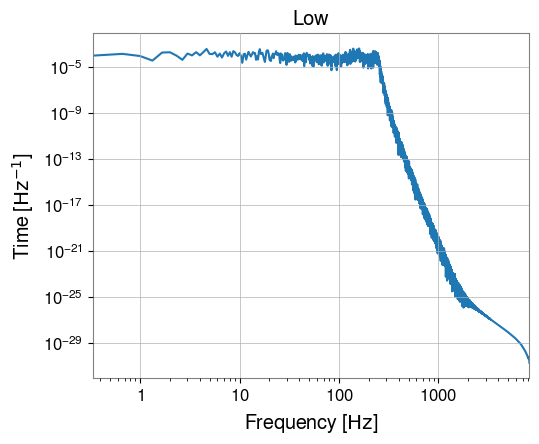

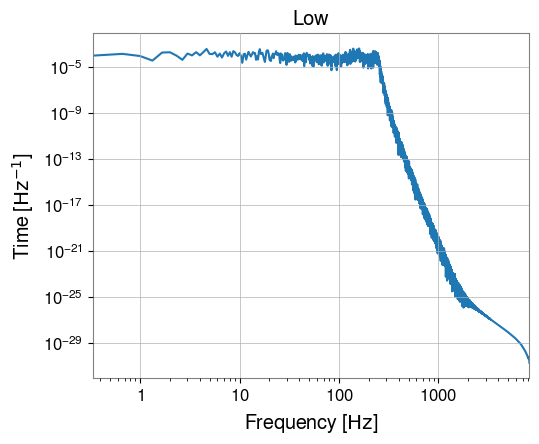

In [4]:
wh.lowpass(250).psd(3).plot(title="Low")

## Low pass - decimate

## High-pass

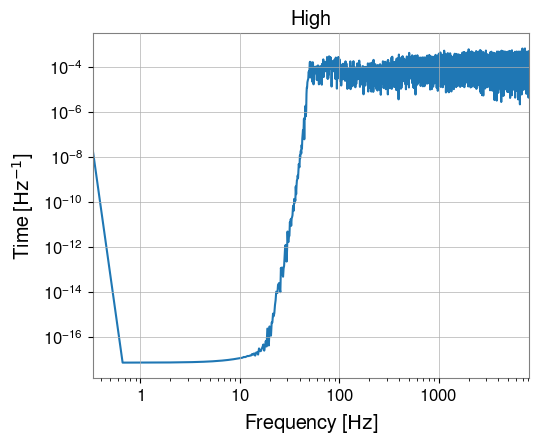

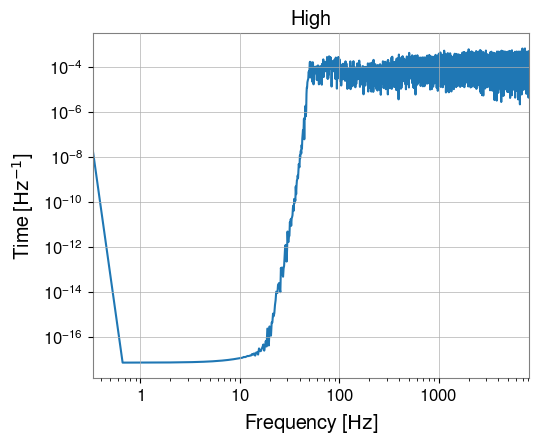

In [5]:
wh.highpass(50).psd(3).plot(title="High")

## Band-pass

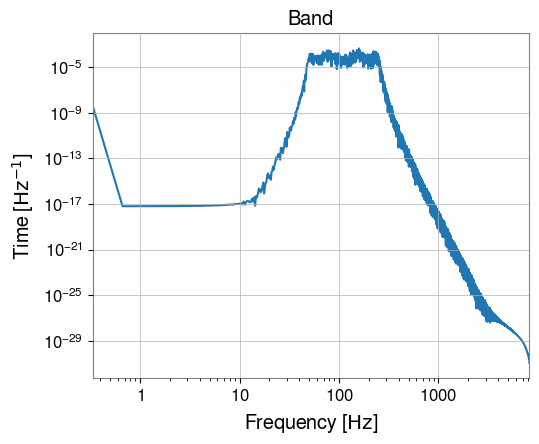

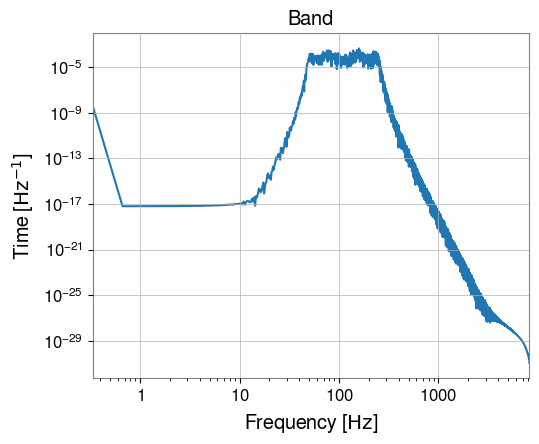

In [6]:
wh.bandpass(50, 250).psd(3).plot(title="Band")

Band-pass filter may be construced by cascading low pass-filter and high-pass. Verify by comparing both power spectral densities.

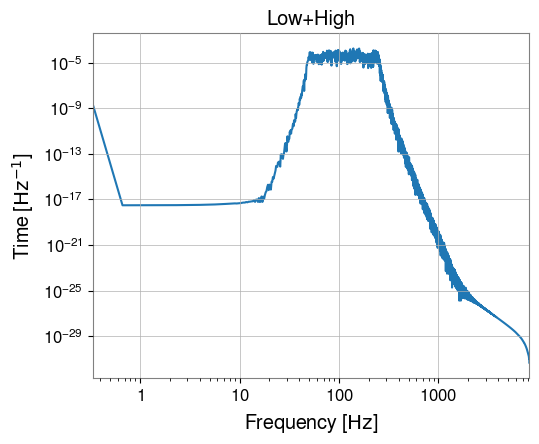

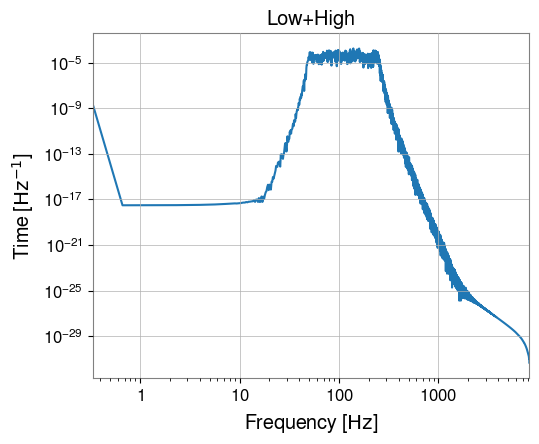

In [7]:
wh.highpass(50).lowpass(250).psd(3).plot(title="Low+High")

## Notch (band-stop)

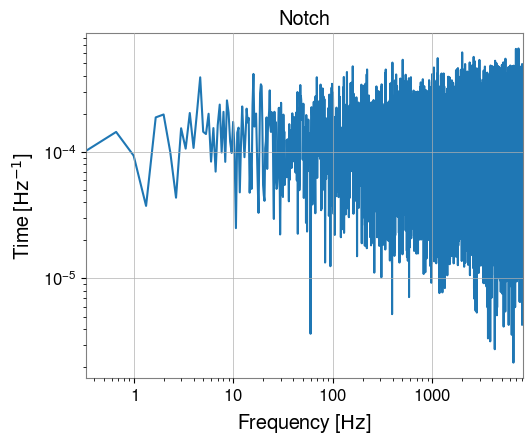

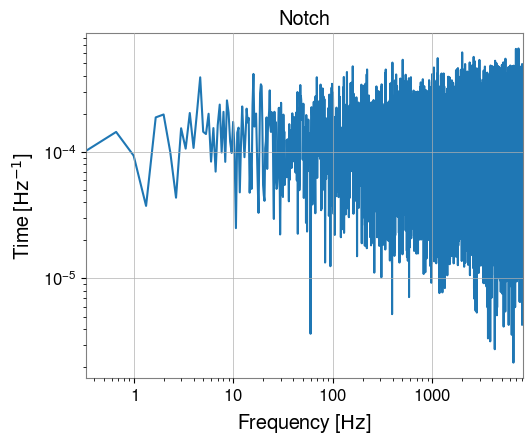

In [8]:
wh.notch(60).psd(3).plot(title="Notch")

# Filters PyCBC

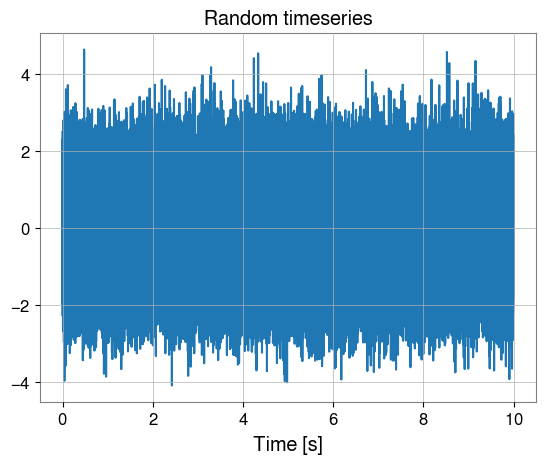

Text(0.5, 0, 'Frequency [Hz]')

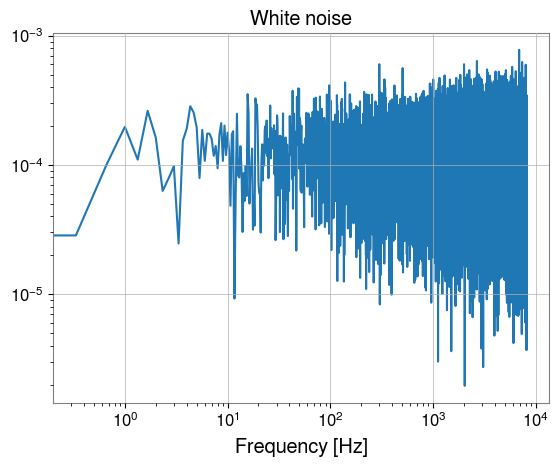

In [9]:
from pycbc.types import TimeSeries  # This TimeSeries substitutes the previous one.
import pycbc.filter
import pylab

# Generate white noise timeseries
# 10s of samples at 16,384kHz
#white = np.random.randn(10*16384)
wh = TimeSeries(white, delta_t=1./16384.)  # Notice: dt is no longer a valid argument.

pylab.plot(wh.sample_times, wh)
pylab.title("Random timeseries")
pylab.xlabel("Time [s]")
pylab.show()
wh_psd = wh.psd(3)
pylab.loglog(wh_psd.sample_frequencies, wh_psd)
pylab.title("White noise")
pylab.xlabel("Frequency [Hz]")

## Low pass

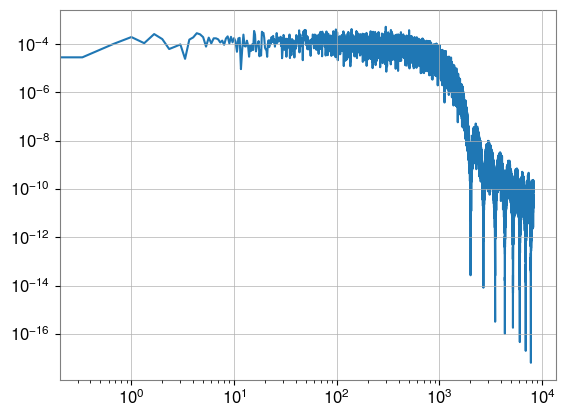

In [13]:
lp = pycbc.filter.lowpass_fir(wh, 250., 8).psd(3)
#lp_psd = lp.psd(3)
pylab.loglog(lp_psd.sample_frequencies, lp)

In [11]:
help(pycbc.filter.lowpass_fir)

Help on function lowpass_fir in module pycbc.filter.resample:

lowpass_fir(timeseries, frequency, order, beta=5.0)
    Lowpass filter the time series using an FIR filtered generated from
    the ideal response passed through a kaiser window (beta = 5.0)
    
    Parameters
    ----------
    Time Series: TimeSeries
        The time series to be low-passed.
    frequency: float
        The frequency below which is suppressed.
    order: int
        Number of corrupted samples on each side of the time series
    beta: float
        Beta parameter of the kaiser window that sets the side lobe attenuation.



## Low pass - decimate

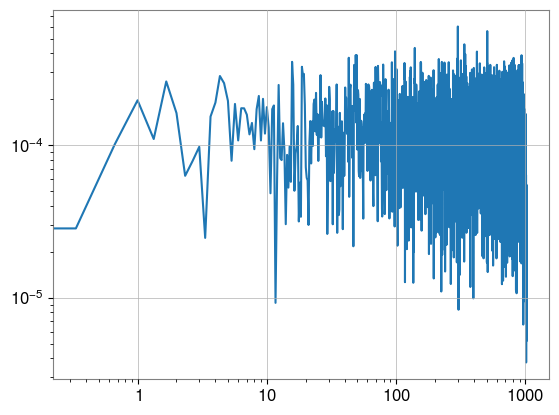

In [14]:
# High frequencies are filtered because ther are no longer in the timeseries due to Nyquist theorem.

lp = pycbc.filter.resample_to_delta_t(wh, 1.0/2048)  # Not every delta_t are supported
lp_psd = lp.psd(3)
pylab.loglog(lp_psd.sample_frequencies, lp_psd)

## High-pass

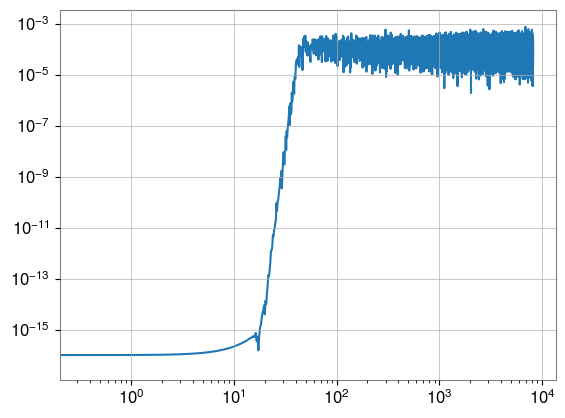

In [16]:
# gwpy like filter

hp = pycbc.filter.highpass(wh, 50.)
hp_psd = hp.psd(3)
pylab.loglog(hp_psd.sample_frequencies, hp_psd)

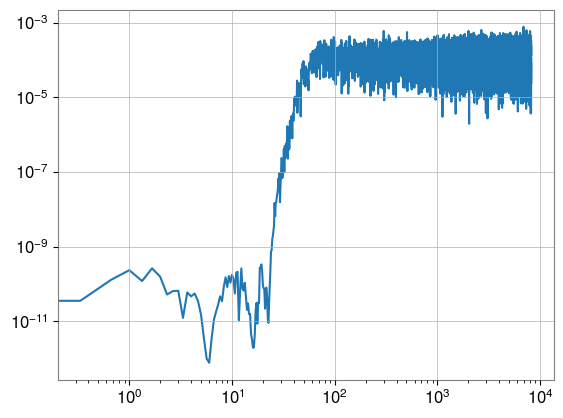

In [17]:
# FIR

hp = pycbc.filter.highpass_fir(wh, 50., 512.0)
hp_psd = hp.psd(3)
pylab.loglog(hp_psd.sample_frequencies, hp_psd)

## Band-pass

In [ ]:
# In pycbc must be built with LP and HP.

## Notch (band-stop)

In [26]:
# FIR

no = pycbc.filter.notch_fir(wh, 50., 60., 8)  # Notice filter order!
no_psd = no.psd(3)
pylab.loglog(no_psd.sample_frequencies, no_psd)

TypeError: unhashable type: 'list'

In [22]:
help(pycbc.filter.notch_fir)

Help on function notch_fir in module pycbc.filter.resample:

notch_fir(timeseries, f1, f2, order, beta=5.0)
    notch filter the time series using an FIR filtered generated from
    the ideal response passed through a time-domain kaiser window (beta = 5.0)
    
    The suppression of the notch filter is related to the bandwidth and
    the number of samples in the filter length. For a few Hz bandwidth,
    a length corresponding to a few seconds is typically
    required to create significant suppression in the notched band.
    To achieve frequency resolution df at sampling frequency fs,
    order should be at least fs/df.
    
    Parameters
    ----------
    Time Series: TimeSeries
        The time series to be notched.
    f1: float
        The start of the frequency suppression.
    f2: float
        The end of the frequency suppression.
    order: int
        Number of corrupted samples on each side of the time series
        (Extent of the filter on either side of zero)
    bet